# Animation Development

Author: WuYan Nie

Course Project, UC Irvine, Math 10, F23

## Introduction
My final project is my personal interest of analyzing the animation development through the past two decades. Honestly, I started to watch anima when I was in middle school, and I really miss the moment that enjoyed the afternoon watching animation with my Dad. In my project, I focus on genre types and start year of anima and the relationship to user rating. I am curiou about whether animation become worse over time.
* First, import the useful tools.

In [ ]:
import altair as alt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

## Organize the Data to Be Useful

* Using pandas read the csv data file. First drop those repeating rows.

In [ ]:
import pandas as pd
df = pd.read_csv('imdb_anime.csv')
df = df.drop(df.index[0:841]).copy()
len(df)

44876

* Notice the lengh of data is really big here. First, try to get rid of some missing rows and useless comlumns.

In [ ]:
df2 = df.drop(['Episode Title','Episode','Metascore','Stars','Summary'], axis=1).copy()
df2 = df2.dropna(axis=0).copy()
df2 = df2.reset_index(drop=True)
len(df2)

14918

* This data still gets 14918 rows. Before making a range for my data, transfer the data type from object to float or int first.

In [ ]:
df2['User Rating'] = df2['User Rating'].apply(lambda x: float(x))
df2['Number of Votes'] = df2['Number of Votes'].apply(lambda x: float(x.replace(',','')))
df2['Runtime'] = df2['Runtime'].apply(lambda x: float(x.replace(' min','').replace(',','')))
df2['Gross'] = df2['Gross'].apply(lambda x: float(x))
df2

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Certificate,Gross
0,One Piece,"Animation, Action, Adventure",8.9,187689.0,24.0,(1999– ),TV-14,187689.0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895.0,99.0,(2023),PG,28895.0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108.0,92.0,(2023),PG,189108.0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457.0,24.0,(2013–2023),TV-MA,434457.0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909.0,24.0,(2020– ),TV-MA,82909.0
...,...,...,...,...,...,...,...,...
14913,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.3,3456.0,24.0,(2019– ),TV-MA,3456.0
14914,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3401.0,24.0,(2019– ),TV-MA,3401.0
14915,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3375.0,24.0,(2019– ),TV-MA,3375.0
14916,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432.0,24.0,(2019– ),TV-14,3432.0


* Here I utilize a useful statistic tool named Interquartile Range Rule for my User Rating. I get rid those data with extremely high or low rating that seem to be outliers.
* Them I choose a range from number of Votes, making sure I don't analyse those animation with low voting and high rating.

In [ ]:
import numpy as np
data1 = df2['User Rating'].sort_values()
q3, q1 = np.percentile(data1, [75 ,25])
iqr = q3 - q1

In [ ]:
range1 = q1 - 1.5*iqr
range2 = q3 + 1.5*iqr

* Here is how I apply the statistic method and range to get the analytic data of animation.
* I wish to analyze both the genre, user rating, and year. So, I also edit the Year column to be the time when this animation first released.
* Here is my df3, which is the final data frame I will utilize.

In [ ]:
ba = (df2['User Rating'] <= range2) & (df2['User Rating'] >= range1)
df3 = df2[ba].copy()
df3 = df3[df3['Number of Votes'] > 2000].copy()
df3['Year']=df3['Year'].apply(lambda x: int(x.replace('(','').replace(')','').replace('–','').replace('I','').replace(' ','')[0:4]))
df3 = df3.reset_index(drop=True)
df3

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Certificate,Gross
0,One Piece,"Animation, Action, Adventure",8.9,187689.0,24.0,1999,TV-14,187689.0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895.0,99.0,2023,PG,28895.0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108.0,92.0,2023,PG,189108.0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457.0,24.0,2013,TV-MA,434457.0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909.0,24.0,2020,TV-MA,82909.0
...,...,...,...,...,...,...,...,...
1201,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.3,3456.0,24.0,2019,TV-MA,3456.0
1202,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3401.0,24.0,2019,TV-MA,3401.0
1203,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3375.0,24.0,2019,TV-MA,3375.0
1204,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432.0,24.0,2019,TV-14,3432.0


## Genre and User Rating
* Frist, I am curious the relationship between Genre and User Rating. What type of genres are famous and more likely to get high rating.
* Through value counts, I access the top 16 genre types of animation. The most common type is action and adventure, and I get rid of this genre since the number is too large. Then, I choose 10 most popular genre type and make a decision tree. (Use df4 here)



In [ ]:
df3['Genre'].value_counts()[0:16]

Animation, Action, Adventure    585
Animation, Adventure, Comedy     89
Animation, Action, Drama         69
Animation, Comedy, Drama         59
Animation, Action, Comedy        55
Animation, Crime, Drama          46
Animation, Adventure, Drama      30
Animation, Action, Fantasy       24
Animation, Action, Crime         23
Animation, Drama, Fantasy        21
Animation, Action, Sci-Fi        21
Animation, Comedy, Romance       16
Animation, Adventure, Family     15
Animation, Drama, Family         14
Animation, Drama, Romance        14
Animation, Comedy, Fantasy       13
Name: Genre, dtype: int64

In [ ]:
top_genre = df3['Genre'].value_counts().index[1:11]
df4 = df3[df3['Genre'].isin(top_genre)].copy()
df5 = df3[df3['Genre']=='Animation, Action, Adventure'].copy() #user later

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4[['User Rating']], df4["Genre"], test_size=0.2, random_state=53)
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=53)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=53)

[Text(0.47058823529411764, 0.9, 'User Rating <= 6.85\ngini = 0.872\nsamples = 349\nvalue = [42, 17, 56, 20, 17, 75, 25, 46, 32, 19]\nclass = Animation, Adventure, Comedy'),
 Text(0.23529411764705882, 0.7, 'User Rating <= 5.95\ngini = 0.79\nsamples = 73\nvalue = [5, 6, 4, 7, 8, 29, 6, 7, 0, 1]\nclass = Animation, Adventure, Comedy'),
 Text(0.11764705882352941, 0.5, 'User Rating <= 5.75\ngini = 0.675\nsamples = 13\nvalue = [0, 0, 0, 2, 5, 5, 0, 0, 0, 1]\nclass = Animation, Action, Sci-Fi'),
 Text(0.058823529411764705, 0.3, 'gini = 0.571\nsamples = 7\nvalue = [0, 0, 0, 0, 2, 4, 0, 0, 0, 1]\nclass = Animation, Adventure, Comedy'),
 Text(0.17647058823529413, 0.3, 'gini = 0.611\nsamples = 6\nvalue = [0, 0, 0, 2, 3, 1, 0, 0, 0, 0]\nclass = Animation, Action, Sci-Fi'),
 Text(0.35294117647058826, 0.5, 'User Rating <= 6.55\ngini = 0.786\nsamples = 60\nvalue = [5, 6, 4, 5, 3, 24, 6, 7, 0, 0]\nclass = Animation, Adventure, Comedy'),
 Text(0.29411764705882354, 0.3, 'gini = 0.74\nsamples = 22\nvalue

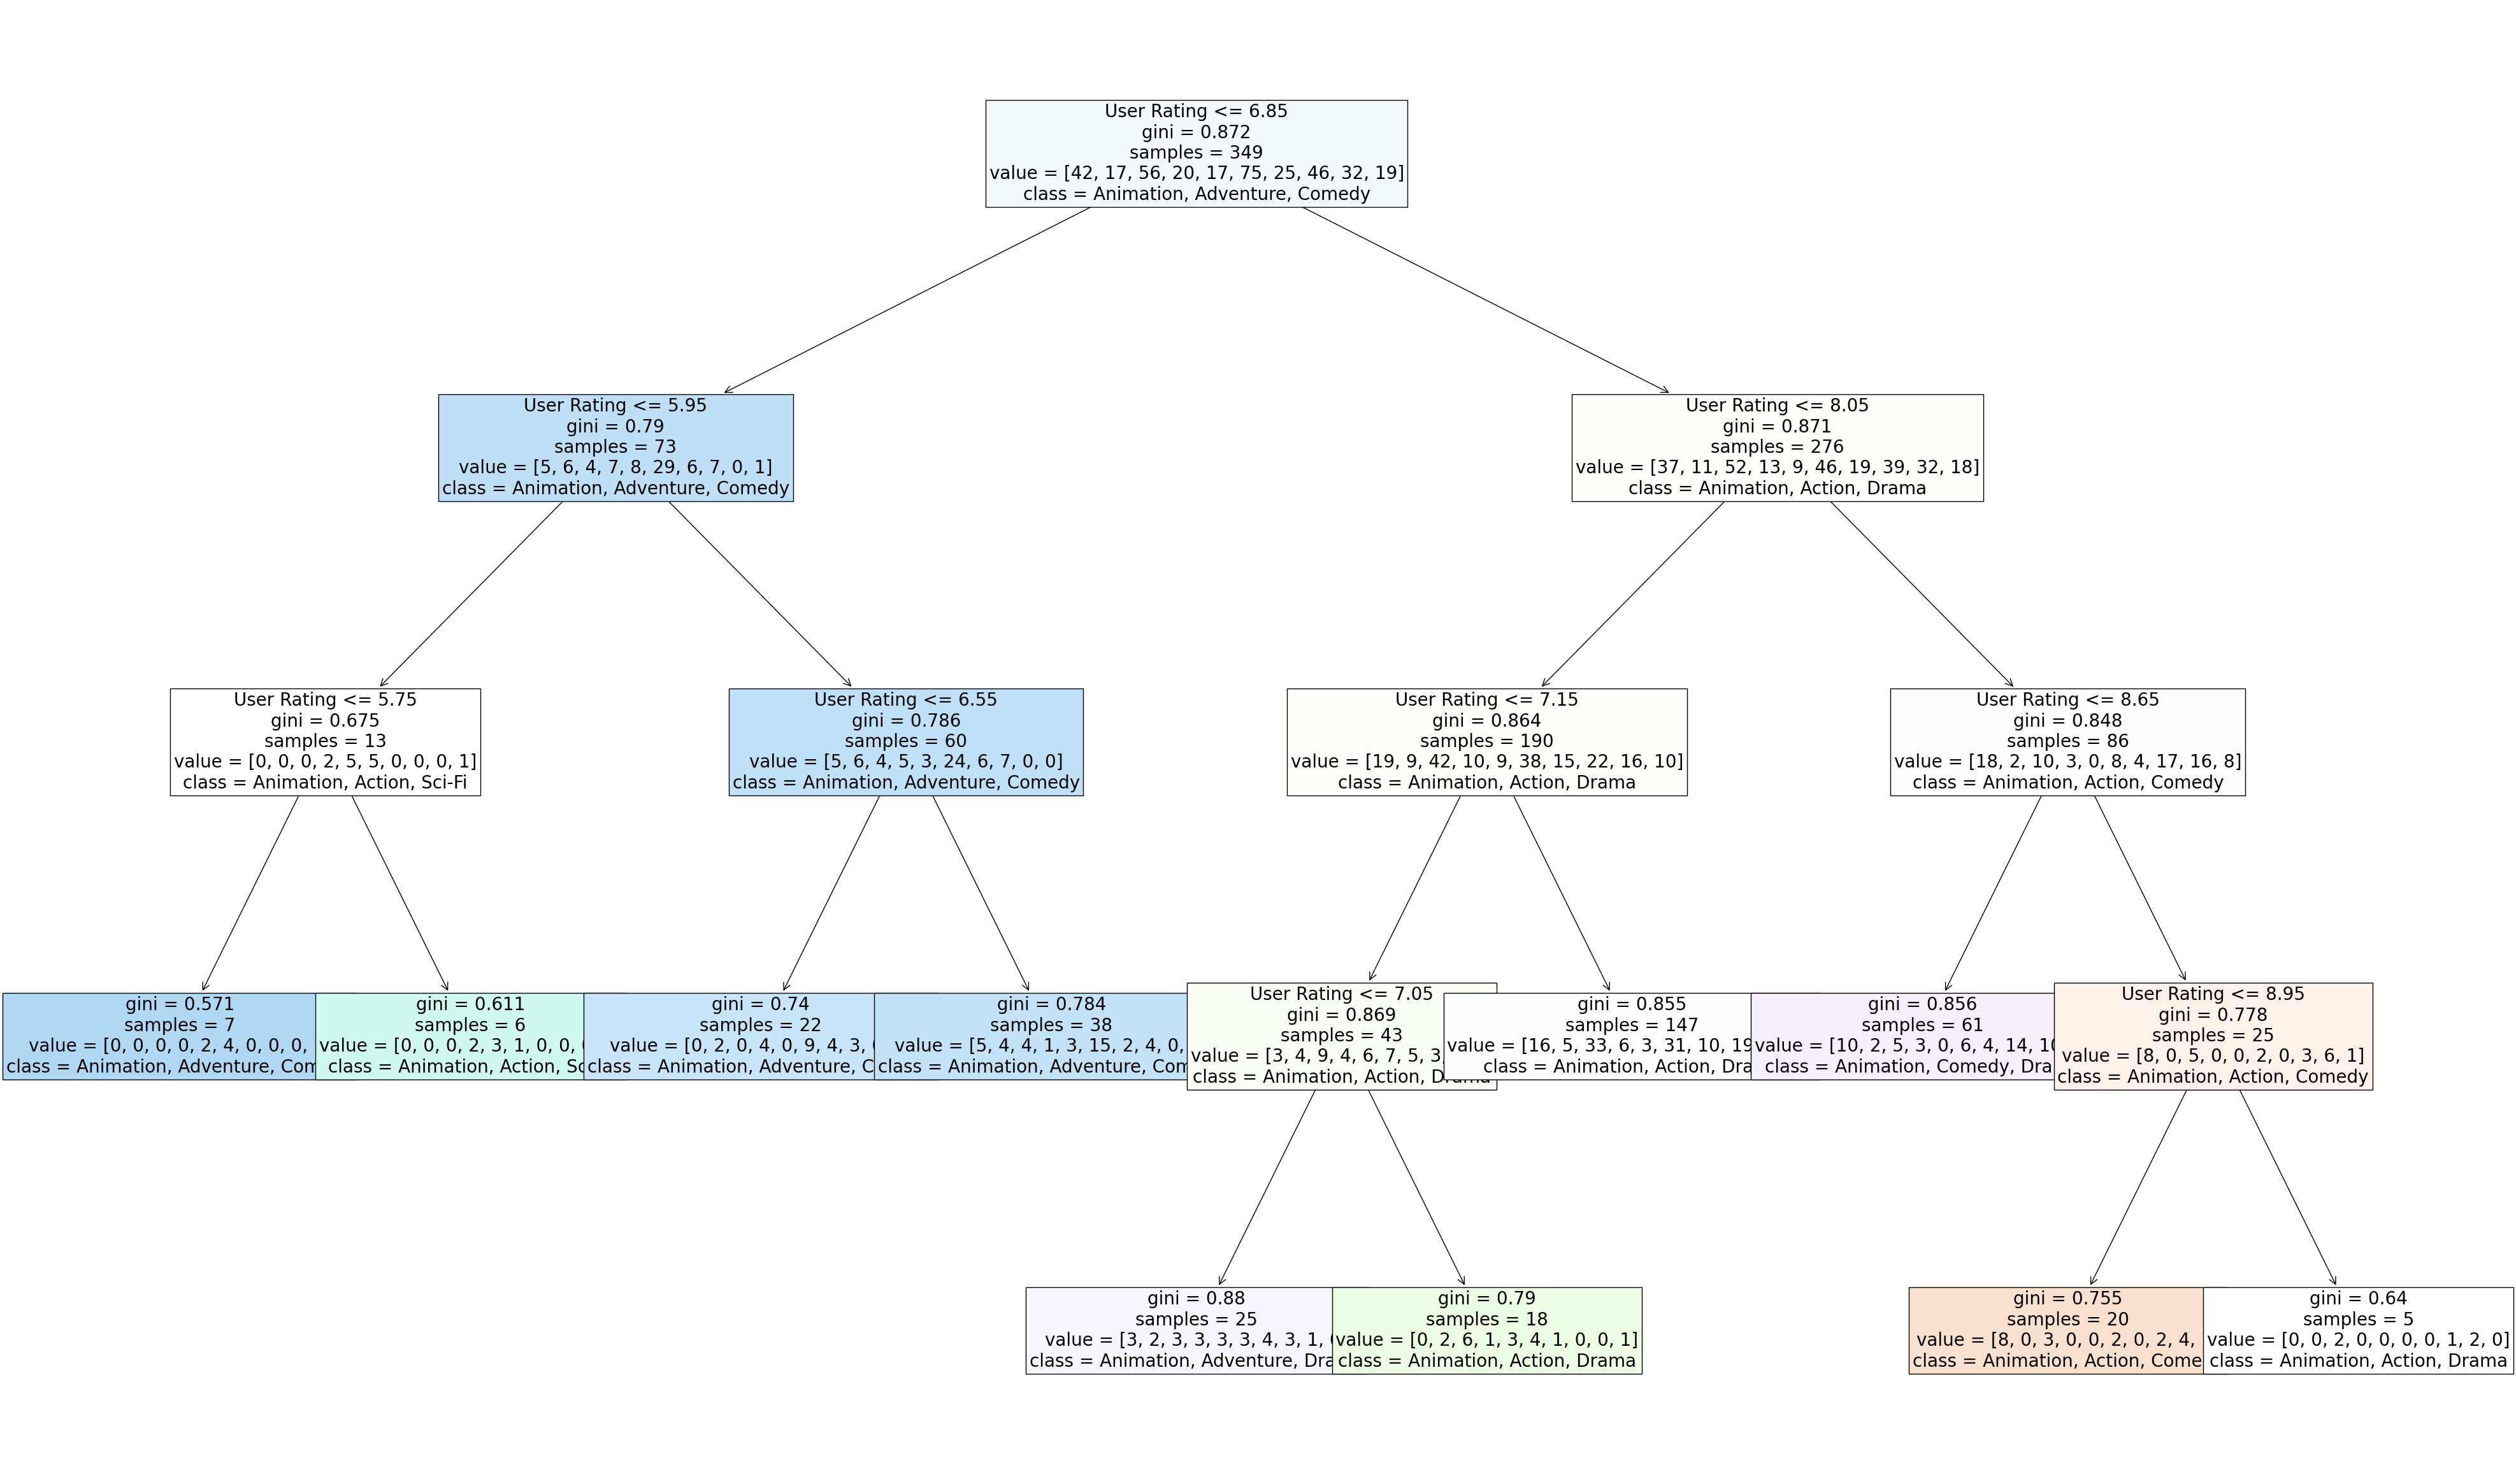

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 30))
plot_tree(clf, 
                feature_names=clf.feature_names_in_,
                class_names=clf.classes_,
                fontsize=20,
                filled=True)

In [ ]:
clf.score(X_test, y_test)

0.18181818181818182

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=20)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.17045454545454544

* Notice how this graph illustrate the relationship between genre and user rating. The higher rating is for genre like action, while the lower rating is for adventure. You can find adventure appears more on the left side.
* But the score is really lower, while my decision has 10 different genres. This is because the classification for genre is too rough and indistinguishable. Even I use the random forest method, this still get really low score.
* What about the genre that contains both action, adventure, which is also the most popular genre. (Use df5 here)

In [ ]:
df5['User Rating'].mean()

8.035042735042735

In [ ]:
df5['User Rating'].std()

1.002199314326418

* The value shows people are more likely to watch the animation that is about adventure and action. This high rating also indicates why there are plenty of anime with such themes.
* What about the mean rating for other types?

In [ ]:
for i in df3['Genre'].value_counts().index[1:11]:
    a = df3[df3['Genre']==i].copy()
    print(f"{a['User Rating'].mean()} for {i}")

7.152808988764045 for Animation, Adventure, Comedy
7.655072463768117 for Animation, Action, Drama
7.733898305084745 for Animation, Comedy, Drama
7.880000000000001 for Animation, Action, Comedy
8.11086956521739 for Animation, Crime, Drama
7.306666666666668 for Animation, Adventure, Drama
7.041666666666667 for Animation, Action, Fantasy
7.230434782608696 for Animation, Action, Crime
7.800000000000001 for Animation, Drama, Fantasy
6.704761904761904 for Animation, Action, Sci-Fi


* You can see almost all other genre types have lower user rating than adventure and action here.
* The conclusion is that people prefer to watch anima with theme adventure and action, and this is why there are so many this type of animation. However, it seems that action is more likely to be accepted by most audience (from our decision tree). This might due to that it is easier to make an enthusiastic action anima simply depict the action. On the other hand, a good adventure anima requires insightful or wild idea to build an attractive world. It is more creative than action type. This also explain why the combination of action and adventure is the most popular anima type.



In [ ]:
top_genre = df3['Genre'].value_counts().index[0:12]
df4 = df3[df3['Genre'].isin(top_genre)].copy()
alt.Chart(df4).mark_circle().encode(
    x = 'Genre',
    y = 'User Rating',
    color = 'Year:Q',
    tooltip=['Year','User Rating', 'Genre']
)

alt.Chart(...)

In [ ]:
alt.Chart(df4).mark_circle().encode(
    x = 'Genre',
    y = 'User Rating',
    color = 'Genre',
    tooltip=['Year','User Rating', 'Genre']
)

alt.Chart(...)

* Those two graphs show the spread of genre and user rating. The first one also shows the pattern of year spread. The most popular type adventure and action are created more in past decade (color in deeper blue), while the other genre is more spread from 2020 to 1980.
* This also show audiences give higher rating to adventure and action type anima, whereas the score spread from 9.5 to 5.7. This indicates factories tried to cater the audiences' preference, and some anima is failed to be accepted by people. However, adventure and action type still get the lower number rating under 6 comparing to other types.



## Year and User Rating
* Now, I am curious about how the time influence people's preference and anima quanlities. I decide to build a timeline graph.

In [ ]:
alt.Chart(df3).mark_circle().encode(
    x = alt.X('Year', scale = alt.Scale(domain = (1964,2023))),
    y = 'User Rating',
    color = 'Genre:N',
    tooltip=['Year','User Rating', 'Genre']
)

alt.Chart(...)

In [ ]:
df3['Year'].value_counts()[1:10]

2019    107
2022     66
2006     63
2015     51
1999     50
2018     48
2017     41
1998     40
2021     39
Name: Year, dtype: int64

* From this graph, you can find that there is a clear line in year 1998, 2006, 2013, 2019, and 2022. Notice that the max number of animations and the highest user rating also exists in those year. The red circle is the type of adventure and action.
* It seems that in 1998, the animation started to grow up, and in 1999 you can see this pattern that the dots become more diverse and spread. This is the start of animation development.
* In 2006, the type of crime and drama dominated the animation market, and this is why in the previous genre analysis, one particular type genre has higher user rating than adventure and action, and that is crime and drama. 
* Moreover, in most years, you can see how the adventure and action dominated the anima market and obtained high user rating. For other year, it behaves either diverse types of animas or only adventure and action type have high user rating.
* The dots become more clustered over time, meaning more and more animations showed up. Meanwhile, the diversity along y axis indicate that anima created earlier are highly qualified. See in year 1998, only one dot received rating lower than 6, while more and more dots below 6 show up over time.
* In conclusion, it's hard to tell whether the animation is gotten worse over time, since the diversity of genre types affect the judgement. Building another linear relation between genre type and user rating in each year might be helpful.



In [ ]:
top_genre = df3['Genre'].value_counts().index[0:10]
df6 = df3[df3['Genre'].isin(top_genre)].copy()
mean_ratings = df6.groupby(['Year', 'Genre'])['User Rating'].mean().reset_index()
mean_ratings

,Year,Genre,User Rating
0,1964,"Animation, Adventure, Comedy",8.000000
1,1967,"Animation, Action, Adventure",7.200000
2,1968,"Animation, Action, Adventure",6.600000
3,1970,"Animation, Adventure, Comedy",7.700000
4,1971,"Animation, Action, Adventure",7.900000
...,...,...,...
241,2022,"Animation, Drama, Fantasy",8.200000
242,2023,"Animation, Action, Adventure",7.028571
243,2023,"Animation, Action, Comedy",8.100000
244,2023,"Animation, Adventure, Comedy",7.100000


In [ ]:
alt.Chart(mean_ratings).mark_line().encode(
    x = 'Year',
    y = 'User Rating',
    color = 'Genre:N',
    column = 'Genre'
)

alt.Chart(...)

* There is still no clear pattern of relationship between year and user rating for each genre. The user rating varies in a range for each genre. Somehow for most genre, the mean user rating started to decrease in past three years. Almost all the line go down on the tail. But based on previous pattern, the line will goes up later.

## Summary

The analysis to genre and year as supervised factors fail to conclude that animation get worse over time. People tend to like animation of adventure and action types because this animation telling a story in people's fantasies. For other types of animas, drama, comedy, and fantasy get the higher score. 
On the other hand, there is no clear relationship between year and user rating for each genre types. The graph goes up and down periodically. It is hard to tell whether as time goes the animation created was getting worse. 
I used to be really addicted to animation. I am a person with strong empathy. Each time watch the animation brought me a different life experience. By looking at the characters' life, I felt empty after each time finishing watching. However, I spent less time watching and finding anima that I am interested in. Through this project, I want to figure out whether I changed. I guess the answer is that I am no longer the innocent and ignorant child. 
Animation is a way people relax and experience different life. Someone depicts their imaginations and created in this form of arts. Even though most famous animations were created from last decade, in the future, I believe there will be more interesting and excellent anima been created.

## Reference
https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb